In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

## Comparing the ocurrence of optimal tree among estimated champion trees

In [2]:
results_folder = os.path.abspath('../../example2/results')
methods = ['SeqROCTM', 'prune', 'smc']
models = ['model1', 'model2']
sizes = [5000, 10000, 20000]
correct_model = '000 1 10 100'

def get_results(method, model_name, size):
    file = '%s/%s/%s_%s.csv' % (results_folder, method, model_name, size)
    df = pd.read_csv(file)    
    df.tree = df.tree.astype(str).map(lambda t: ' '.join(sorted(t.split())))
    return df

def compare_optimal_tree_occurrence(model_name):
    df = pd.DataFrame(columns= ['model', 'sample_size'] + methods)
    for size in sizes:
        arr = [(get_results(method, model_name, size).tree==correct_model).astype(int).sum() for method in methods]
        df.loc[len(df)] = ([model_name, size] + arr)
    return df.sort_values(['model', 'sample_size'])

def plot_model(model):
    plt.figure(figsize=(10,6))
    for m in methods:
        plt.plot(model.sample_size, model[m], label=m)
    plt.xticks([5000, 10000, 20000])
    plt.ylabel('Optimal trees found among champion trees (%)')
    plt.xlabel('Resamples size')
    plt.legend()
    plt.show()

### Model 1

In [3]:
model1 = compare_optimal_tree_occurrence('model1')
model1

,model,sample_size,SeqROCTM,prune,smc
0,model1,5000,37,72,37
1,model1,10000,49,80,55
2,model1,20000,82,92,89


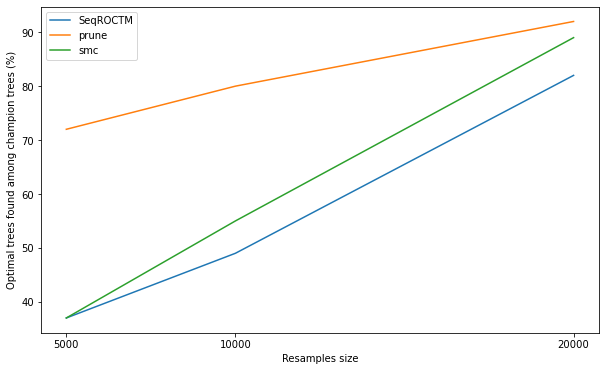

In [4]:
plot_model(model1)

### Model 2

In [32]:
model2 = compare_optimal_tree_occurrence('model2')
model2

,model,sample_size,SeqROCTM,prune,smc
0,model2,5000,67,89,53
1,model2,10000,87,94,42
2,model2,20000,99,100,58


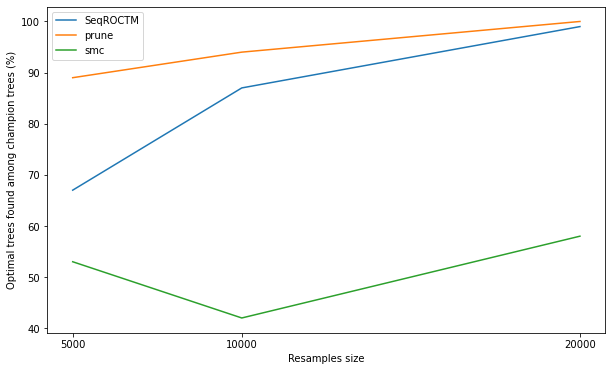

In [33]:
plot_model(model2)

In [42]:
get_results('smc', 'model1', 5000).loc[110:150]

,model_name,sample_idx,method,tree_idx,tree,num_contexts,likelihood,opt
110,model1,11,smc,3,00000 0010 001000 001010 1 100 10000 101000 10...,9,-1637.083675,0
111,model1,11,smc,4,00000 001000 1 10 100 10000 101000,7,-1638.023520,0
112,model1,11,smc,5,0000 001000 1 10 100 101000,6,-1638.641355,0
113,model1,11,smc,6,00 1 10,3,-1641.344295,0
114,model1,11,smc,7,0 1,2,-1661.086259,1
115,model1,11,smc,8,nan,1,-3403.522313,0
116,model1,12,smc,0,000000 000010 000100 001000 001010 1 10000 100...,14,-1714.305444,0
117,model1,12,smc,1,000000 000010 000100 001010 1 1000 10000 10000...,13,-1714.305973,0
118,model1,12,smc,2,000000 000010 00100 001010 1 1000 10000 100000...,12,-1714.339075,0
119,model1,12,smc,3,0000 000010 00100 001010 1 1000 100010 10010 1...,10,-1714.524232,0
